# Australian Elections 2019 Tweet dataset Sentiment Analysis

# Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from collections import Counter

In [3]:
# Read data
df = pd.read_csv('auspol2019.csv')

df.head(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,5/20/2019 9:13,1.1304E+18,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",11/25/2009 9:19
1,5/20/2019 9:13,1.1304E+18,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",8/23/2012 10:20
2,5/20/2019 9:13,1.1304E+18,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,12/11/2006 7:38
3,5/20/2019 9:13,1.1304E+18,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,9/14/2017 3:10
4,5/20/2019 9:13,1.1304E+18,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,3/16/2012 3:51
5,5/20/2019 9:13,1.1304E+18,Australia's pollsters to review incorrect elec...,0.0,0.0,7.909160e+17,Adal News,adalnewspk,NaN,NaN,10/25/2016 13:59
6,5/20/2019 9:12,1.1304E+18,It is disappointing that @tanya_plibersek has ...,0.0,0.0,5.100258e+07,Matthew Rimmer,DrRimmer,Professor of IP & Innovation Law @QUTLaw @QUT_...,"Brisbane, Queensland",6/26/2009 10:17
7,5/20/2019 9:12,1.1304E+18,@robynesc I feel like this exact thing happens...,0.0,0.0,2.271272e+09,Jaz Jubilee,jazjubilee,"She/Them. 23, Studying to Teach ESL💖 Currently...",Australia,1/1/2014 6:39
8,5/20/2019 9:12,1.1304E+18,'Quiet Australians' are the latest to upset el...,0.0,0.0,1.740061e+09,Moved,Topphnygn,Moved,NaN,9/7/2013 3:29
9,5/20/2019 9:11,1.1304E+18,Conservatives look set to form gov't after Aus...,0.0,0.0,2.797642e+08,Nevada News,Nevada,Latest news for Nevada.,"Nevada, USA",4/10/2011 0:00


In [4]:
# Exploratory Data Analysis

C:\Users\Chandini\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


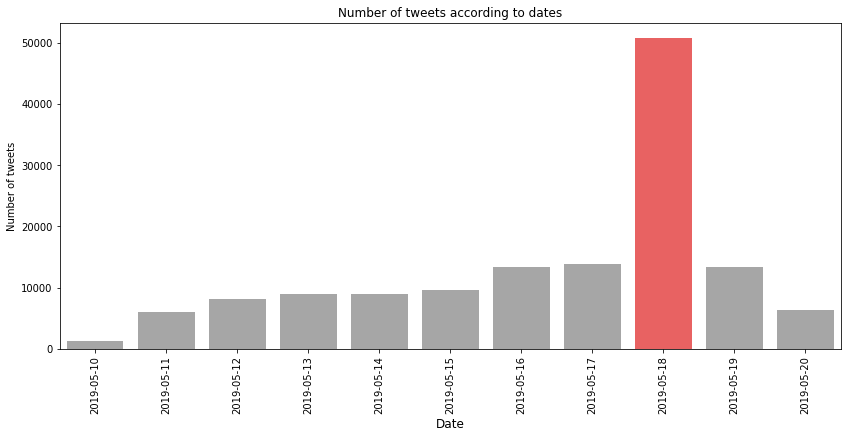

C:\Users\Chandini\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


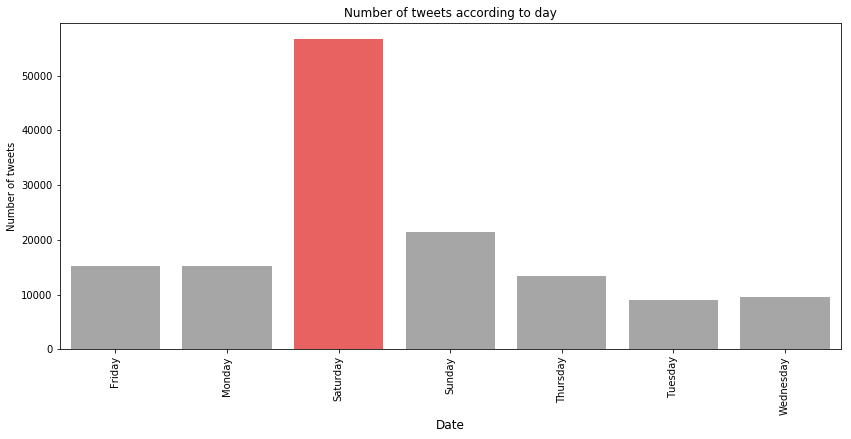

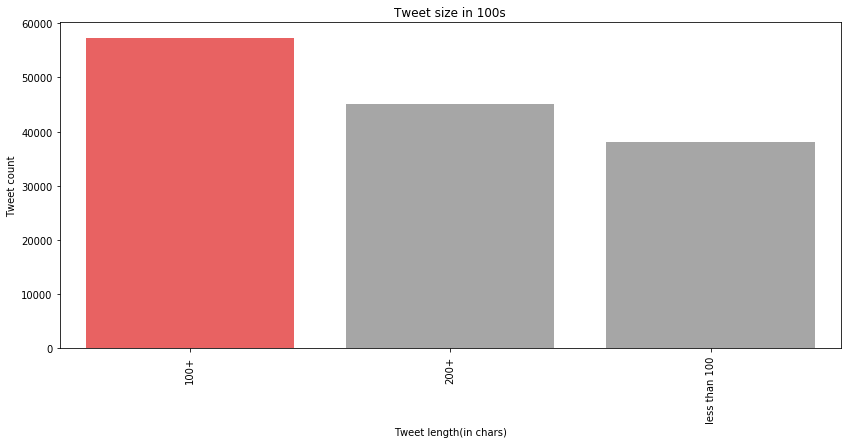

In [14]:

# Remove NA records
tweets_df = df.dropna()

#Date wise tweet
tweets_df['created_at'] =  pd.to_datetime(tweets_df['created_at'])
cnt_srs = tweets_df['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
clrs = ['grey' if (x<max(cnt_srs.values)) else 'red' for x in cnt_srs.values]
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.7, palette=clrs)
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=10)
plt.title("Number of tweets according to dates")
plt.show()

#Daywise Distribution
tweets_df['created_at'] =  pd.to_datetime(tweets_df['created_at'])
cnt_srs = tweets_df['created_at'].dt.weekday_name.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))

clrs = ['grey' if (x<max(cnt_srs.values)) else 'red' for x in cnt_srs.values]
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.7, palette=clrs)
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=10)
plt.title("Number of tweets according to day")
plt.show()


# Tweet length Distribution
def tweetLength(stmt):
    stmt_len = len(str(stmt))
    if(stmt_len>200):
        return '200+'
    if(stmt_len>100 and stmt_len<200):
        return '100+'
    else:
        return 'less than 100'

cnt_srs = tweets_df['full_text'].apply(tweetLength)
cnt_srs = cnt_srs.value_counts()
plt.figure(figsize=(14,6))
clrs = ['grey' if (x<max(cnt_srs.values)) else 'red' for x in cnt_srs.values]
#clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.7, palette=clrs)
plt.xticks(rotation='vertical')
plt.xlabel('Tweet length(in chars)')
plt.ylabel('Tweet count')
plt.title("Tweet size in 100s")
plt.show()

# Sentiment analysis

In [7]:
# Collect the stop words from nltk package
stopWords = set(stopwords.words('english'))

# Identify a set of punctuation words to exclude
excludeLetters = set([',','.',';','-']) 

# Use Lemmatizer to normalize the word
lemma = WordNetLemmatizer()

user_profile_text=tweets_df['user_description']
def normalize(word_text):
    stop_free = " ".join([word for word in word_text.lower().split() if word not in stopWords])
    punc_free = ''.join(ch for ch in stop_free if ch not in excludeLetters)
    normalized_text = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized_text
 
norm_profile = [normalize(profile) for profile in user_profile_text]

# Generate WordCloud from WordCloud package

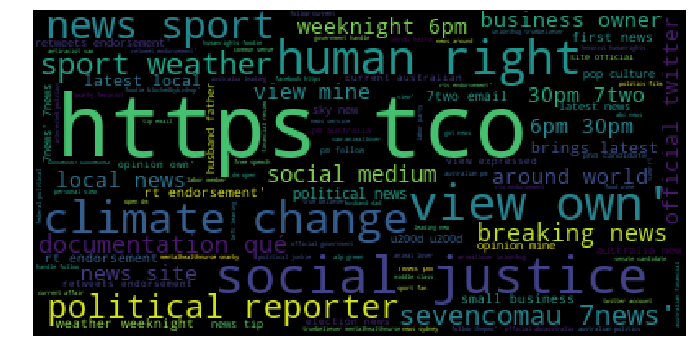

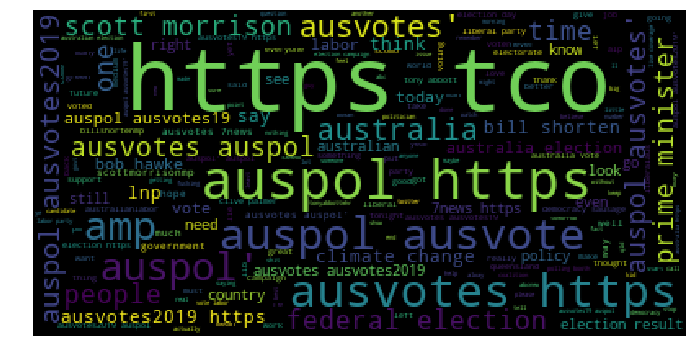

In [8]:
#wword cloud on the user profile text
plt.figure(figsize=(14,6))
wordcloud = WordCloud().generate(str(norm_profile))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#wword cloud on the full text
full_text_tweets = tweets_df['full_text']
norm_doc = [normalize(tweet) for tweet in full_text_tweets]
plt.figure(figsize=(14,6))
wordcloud = WordCloud().generate(str(norm_doc))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Calculate the sentiment using TextBlob package

In [10]:

tweets_df['sentiment'] = full_text_tweets.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

#mapping the polarity values to different labels
tweets_df['Polarity']=pd.cut(tweets_df['sentiment'],[-np.inf, -.01, .01, np.inf],
                             labels=['Negative','Neutral','Positive'])
tweets_df.head(10)

C:\Users\Chandini\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chandini\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at,sentiment,Polarity
0,2019-05-20 09:13:00,1.1304E+18,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",11/25/2009 9:19,-0.200000,Negative
1,2019-05-20 09:13:00,1.1304E+18,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",8/23/2012 10:20,0.000000,Neutral
2,2019-05-20 09:13:00,1.1304E+18,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,12/11/2006 7:38,0.200000,Positive
4,2019-05-20 09:13:00,1.1304E+18,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,3/16/2012 3:51,0.000000,Neutral
6,2019-05-20 09:12:00,1.1304E+18,It is disappointing that @tanya_plibersek has ...,0.0,0.0,5.100258e+07,Matthew Rimmer,DrRimmer,Professor of IP & Innovation Law @QUTLaw @QUT_...,"Brisbane, Queensland",6/26/2009 10:17,-0.600000,Negative
7,2019-05-20 09:12:00,1.1304E+18,@robynesc I feel like this exact thing happens...,0.0,0.0,2.271272e+09,Jaz Jubilee,jazjubilee,"She/Them. 23, Studying to Teach ESL💖 Currently...",Australia,1/1/2014 6:39,0.441667,Positive
9,2019-05-20 09:11:00,1.1304E+18,Conservatives look set to form gov't after Aus...,0.0,0.0,2.797642e+08,Nevada News,Nevada,Latest news for Nevada.,"Nevada, USA",4/10/2011 0:00,0.000000,Neutral
10,2019-05-20 09:11:00,1.1304E+18,"#auspol Hear, bloody hear. Any party that oppo...",1.0,2.0,1.721130e+09,Gary Fallon,GaryFallon2,Against all Moronic Right Wing politicians. In...,Melbourne Australia,9/2/2013 4:27,-0.400000,Negative
12,2019-05-20 09:10:00,1.1304E+18,Conservatives look set to form gov’t after Aus...,0.0,0.0,1.117450e+18,Web Design Company,WebDesignerInc,Modern web design services designed to grow yo...,United States,4/14/2019 15:46,0.000000,Neutral
13,2019-05-20 09:10:00,1.1304E+18,Australia's pollsters to review incorrect elec...,0.0,0.0,9.809770e+17,Jo han,Johanseller29,Good at selling,"California,orlando",4/3/2018 1:15,0.000000,Neutral


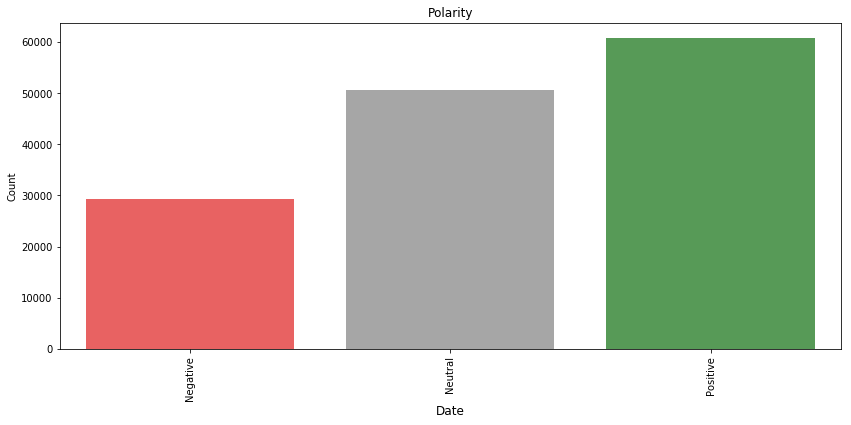

In [12]:
#Polarity Distribution
cnt_srs = tweets_df['Polarity'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
clrs=['red','grey','green']
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.7, palette=clrs)
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.title("Polarity")
plt.show()